# Библиотеки

In [1]:
import numpy as np # Работа с массивами чисел
import pandas as pd # Работа с раблицами
from sklearn.neighbors import KNeighborsClassifier # Классификатор методом ближайших соседей
from sklearn.model_selection import KFold #Разбиение датасета на K частей
from matplotlib import pyplot as plt # Построение графиков
from matplotlib.colors import ListedColormap

RANDOM_STATE = 42 #для воспроизводимости

# Загрузка данных

In [2]:
df = pd.read_csv('B:/SKILL_FACTORY/seeds_dataset.txt',sep="\t", header = None) # Загрузка данных из файла
df.columns = ["area_A",                                                        # также насройка таблицы
              "perimeter_P",
              "compactness_C",
              "length_of_kernel",
              "width_of_kernel",
              "asymmetry_coefficient",
              "length_of_kernel_groove",
             "y"]

# EDA

In [3]:
df.head() # Canadian, Koma, Rosa

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_A                   210 non-null    float64
 1   perimeter_P              210 non-null    float64
 2   compactness_C            210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   y                        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


## area_A (предварительный анализ данных)

<AxesSubplot:>

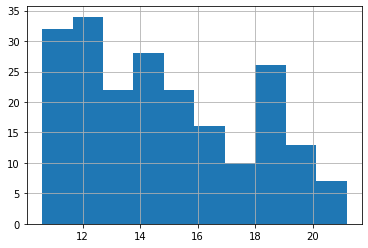

In [5]:
df['area_A'].hist()

In [6]:
df['area_A'].describe()

count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: area_A, dtype: float64

## perimeter_P

<AxesSubplot:>

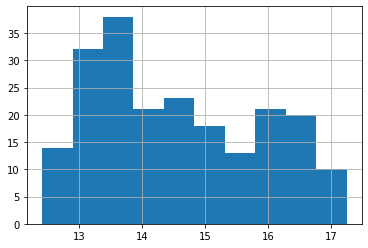

In [7]:
df['perimeter_P'].hist()

In [8]:
df['perimeter_P'].describe()

count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: perimeter_P, dtype: float64

## compactness_C

<AxesSubplot:>

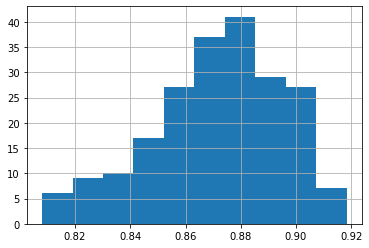

In [9]:
df['compactness_C'].hist()

In [10]:
df['compactness_C'].describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: compactness_C, dtype: float64

## length_of_kernel

<AxesSubplot:>

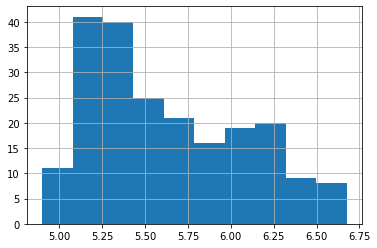

In [11]:
df['length_of_kernel'].hist()

In [12]:
df['length_of_kernel'].describe()

count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: length_of_kernel, dtype: float64

## width_of_kernel

<AxesSubplot:>

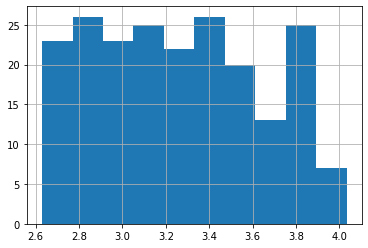

In [13]:
df['width_of_kernel'].hist()

In [14]:
df['width_of_kernel'].describe()

count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: width_of_kernel, dtype: float64

## asymmetry_coefficient

<AxesSubplot:>

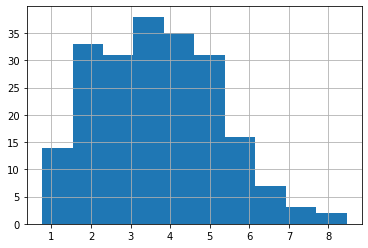

In [15]:
df['asymmetry_coefficient'].hist()

In [16]:
df['asymmetry_coefficient'].describe()

count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: asymmetry_coefficient, dtype: float64

## length_of_kernel_groove

<AxesSubplot:>

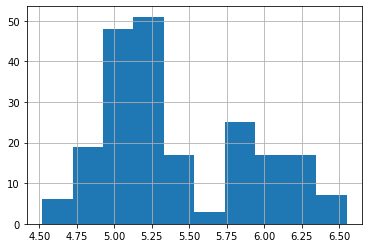

In [17]:
df['length_of_kernel_groove'].hist()

In [18]:
df['length_of_kernel_groove'].describe()

count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: length_of_kernel_groove, dtype: float64

# Построение моделей

In [19]:
features = df.iloc[:,:-1].values # в features приравниваются только признаки (Х)
labels = df.iloc[:,-1].values # в labels приравниваются только целевая переменная (Y)

In [20]:
classifier = KNeighborsClassifier(n_neighbors=1) # подготавливаем модель с 1 соседом
kf = KFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE) # Подготавливаем Kfold разбиение

In [21]:
kf.get_n_splits(features) # выводим кол-во разбиений

5

In [22]:
means = []


#
# Начинаем обучение c 1 соседом
#
for training,testing in kf.split(features):
    # Мы обучаем модель на этом разбиении с помощью «fit», а затем применяем ее к
    # данным тестирования с помощью "prediction":
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    # np.mean в массиве логических значений возвращает долю правильных решений
    # для конкретной итерации
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print('Результат перекрестной проверки с использованием KFold: {:.1%}'.format(np.mean(means)))

Результат перекрестной проверки с использованием KFold: 90.0%


In [23]:
def fit_model(k, features, labels):
    '''Обучаем модель k-nn'''
    # There is no model in k-nn, just a copy of the inputs
    return k, features.copy(), labels.copy()


def plurality(xs):
    '''Нахождение самого распространенного элемента в коллекции'''
    from collections import defaultdict
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    maxv = max(counts.values())
    for k, v in counts.items():
        if v == maxv:
            return k

def predict(model, features):
    '''Применяем k-nn можель'''
    k, train_feats, labels = model
    results = []
    for f in features:
        label_dist = []
        # Вычисляем все расстояния:
        for t, ell in zip(train_feats, labels):
            label_dist.append((np.linalg.norm(f - t), ell))
        label_dist.sort(key=lambda d_ell: d_ell[0])
        label_dist = label_dist[:k]
        results.append(plurality([ell for _, ell in label_dist]))
    return np.array(results)

B:\Anaconda\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
B:\Anaconda\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


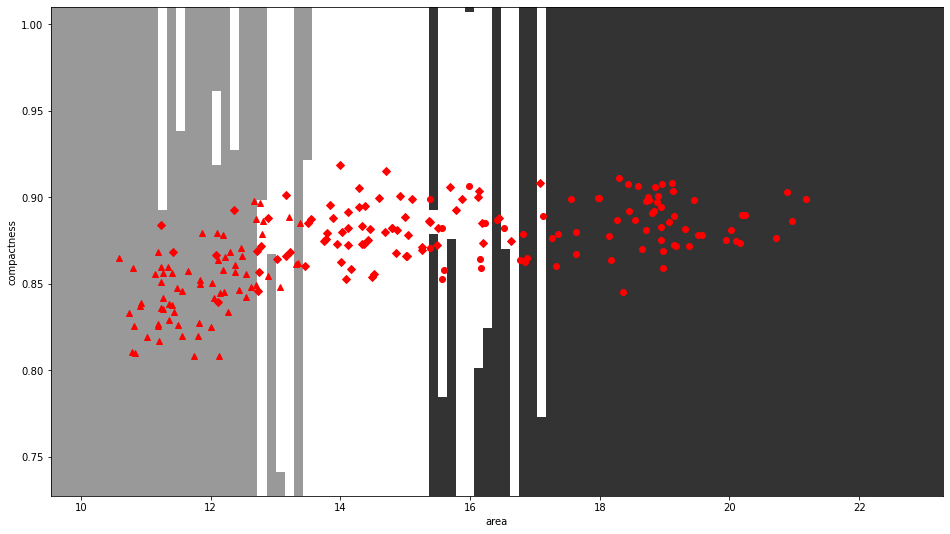

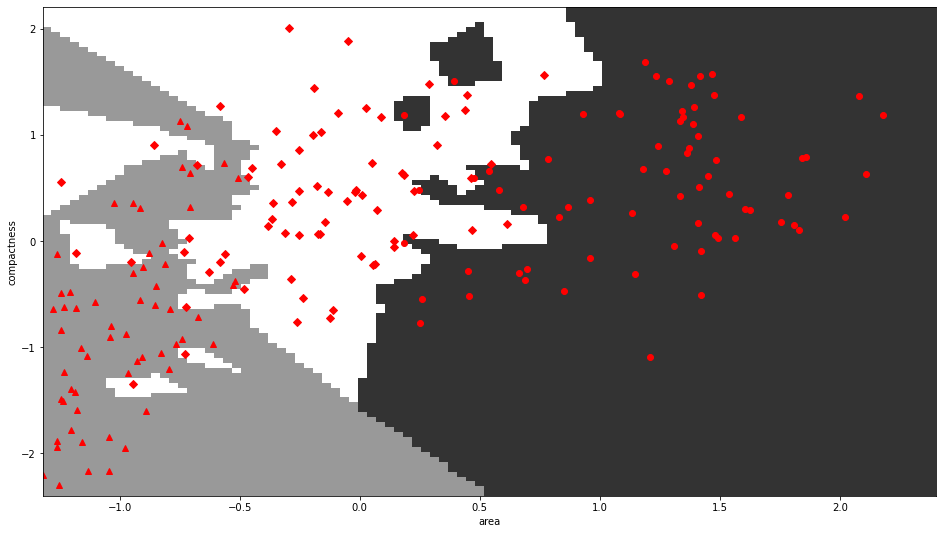

In [24]:
COLOUR_FIGURE = False

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]


def plot_decision(features, labels):
    """
    Построение границы решения для KNN
     Параметры
     ----------
     особенности: ndarray
     метки: последовательность
     Возврат
     -------
     fig: Рисунок Matplotlib
     ax: Топоры Matplotlib
     """
    
    # Canadian - ромбы, Koma - точки, Rosa - реугольники
    y0, y1 = features[:, 2].min() * .9, features[:, 2].max() * 1.1
    x0, x1 = features[:, 0].min() * .9, features[:, 0].max() * 1.1
    X = np.linspace(x0, x1, 100)
    Y = np.linspace(y0, y1, 100)
    X, Y = np.meshgrid(X, Y)

    model = fit_model(1, features[:, (0, 2)], np.array(labels))
    C = predict(
        model, np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .6, .6), (.6, 1., .6), (.6, .6, 1.)])
    else:
        cmap = ListedColormap([(1., 1., 1.), (.2, .2, .2), (.6, .6, .6)])
    fig,ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(9)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[2])
    
    ax.pcolormesh(X, Y, C, cmap=cmap)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .0, .0), (.0, 1., .0), (.0, .0, 1.)])
        ax.scatter(features[:, 0], features[:, 2], c=labels, cmap=cmap)
    else:
        for lab, ma in zip(range(3), "Do^"):
            ax.plot(features[labels == lab, 0], features[
                     labels == lab, 2], ma, color='red')
    return fig,ax

names = sorted(set(labels))
labels = np.array([names.index(ell) for ell in labels])

fig,ax = plot_decision(features, labels) # выводим риссунок без нормализации и стандартизации


features -= features.mean(0)
features /= features.std(0)
fig,ax = plot_decision(features, labels) # выводим риссунок c нормализацией и стандартизацией

In [25]:

#
# Начинаем обучение c 1 соседом
#

features = df.iloc[:,:-1].values # в features приравниваются только признаки (Х)
labels = df.iloc[:,-1].values # в labels приравниваются только целевая переменная (Y)

classifier = KNeighborsClassifier(n_neighbors=5) # подготавливаем модель с 1 соседом
kf = KFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE) # Подготавливаем Kfold разбиение

kf.get_n_splits(features)  # выводим кол-во разбиений

means = []

for training,testing in kf.split(features):
    # Мы обучаем модель на этом разбиении с помощью «fit», а затем применяем ее к
    # данным тестирования с помощью "prediction":
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    # np.mean в массиве логических значений возвращает долю правильных решений
    # для конкретной итерации
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print('Результат перекрестной проверки с использованием KFold: {:.1%}'.format(np.mean(means)))

Результат перекрестной проверки с использованием KFold: 88.1%
